<a href="https://colab.research.google.com/github/PabloCaSan/Machine_Learning_Notes/blob/main/ArbolDecision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Árbol de decisión

En esta libreta se aplicará el modelo de árbol de decisión para los datos de sobrevivientes del Titanic

## Cargando y explorando los datos

Empezamos por importar las librerías

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re
from sklearn import tree
from sklearn.model_selection import train_test_split
%matplotlib inline
sns.set()

Cargamos los archivos de datos, se usarán variables diferentes para los datos de prueba y los datos de entrenamiento. A diferencia de otras libretas, en este caso no se conectó a Google Drive sino al almacenamiento local de Google Colab

In [2]:
df_test = pd.read_csv('/content/titanic-test.csv')
df_test.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [3]:
df_train = pd.read_csv('/content/titanic-train.csv')
df_train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Veamos cómo están compuestas las tablas

In [4]:
df_test.shape

(418, 11)

In [5]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [6]:
df_train.shape

(891, 12)

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Observemos que en ninguna de las tablas hay datos nulos

Resulta interesante ver cuántos hombre y cuántas mujeres sobrevivieron

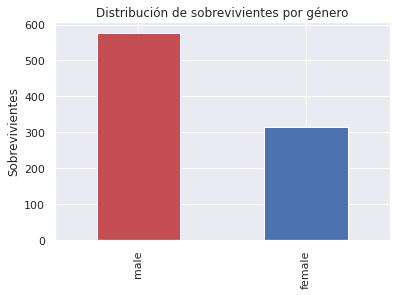

In [8]:
df_train.Sex.value_counts().plot(kind='bar', color=['r','b'])
plt.title('Distribución de sobrevivientes por género')
plt.ylabel('Sobrevivientes')
plt.show()

## Preparando y limpiando los datos

Ahora dividiremos los datos para obtener los resultados que deseamos. Usaremos otra herramienta de Scikitlearn

In [9]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

LabelEncoder permite transformar variables no numéricas a variables numéricas, para que puedan ser comparadas. Lo aplicamos al género (Sex)

In [10]:
encoder_sex = label_encoder.fit_transform(df_train['Sex'])
df_train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Ahora nos aseguramos de que no haya valores nulos, esto es una operación de rutina. Una manera de lidiar con los datos nulos, para que no afecten mucho a la hora de aplicar el modelo, es rellenarlos con el valor de la media

In [11]:
df_train['Age'].isnull().sum() #Veamos cuántos datos nulos hay inicialmente

177

In [12]:
df_train['Embarked'].isnull().sum() #Veamos cuántos datos nulos hay inicialmente

2

In [13]:
df_train['Age'] = df_train['Age'].fillna(df_train['Age'].median()) #Rellenamos con la media ya que son datos numéricos
df_train['Embarked'] = df_train['Embarked'].fillna('S') #Rellenamos con S ya que son datos categóricos

In [14]:
df_train['Age'].isnull().sum() #Veamos si funcionó lo que hicimos

0

In [15]:
df_train['Embarked'].isnull().sum() #Veamos si funcionó lo que hicimos

0

Ahora eliminemos las columnas que no son relevantes

In [16]:
df_train_l = df_train.drop(['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin'], axis=1)
df_train_l.head(5)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


Ahora creamos una columna adicional con los datos categóricos

In [17]:
col_categ = [cname for cname in df_train_l.columns if 
             df_train_l[cname].nunique() < 10 and
             df_train_l[cname].dtype == 'object'
             ]

Y creamos otra columna con los datos numéricos

In [18]:
col_num = [cname for cname in df_train_l.columns if 
             df_train_l[cname].dtype in ['int64', 'float64']
             ]

Ahora las unimos

In [19]:
cols = col_categ + col_num

Y las aplicamos al dataframe

In [20]:
df_train_l = df_train_l[cols]

Convertimos variables categóricas en variables indicadoras (dummies)

In [21]:
dummies = pd.get_dummies(df_train_l)

Veamos cuáles y cuántas clases tiene el dataframe

In [22]:
df_train['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

## Aplicando el modelo

Definimos la variable predictora

In [23]:
y_target = df_train['Survived'].values
x_dummies = dummies.values

Especificamos las variables de entrenamiento, la cantidad de datos a utilizar y la semilla aleatoria

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x_dummies, y_target, test_size = 0.25, random_state=1)

Aplicamos el modelo

In [25]:
tree_one = tree.DecisionTreeClassifier(max_depth=3)
tree_one = tree_one.fit(x_train, y_train)

Y vemos la exactitud del modelo

In [26]:
tree_accuracy = round(tree_one.score(x_test, y_test), 4)
print('Accuracy: %0.4f' % (tree_accuracy))

Accuracy: 0.8027


## Visualización gráfica

Cargamos librerías para la visualización gráfica del árbol de decisión

In [27]:
from io import StringIO
from IPython.display import Image, display
import pydotplus

Preparamos las variables y el formato de salida para la visualización gráfica

In [28]:
out = StringIO()
tree.export_graphviz(tree_one, out_file = out)

graph = pydotplus.graph_from_dot_data(out.getvalue())
graph.write_png('titanic.png')

True

Se ha creado un archivo .png en donde se observa el árbol de decisión

La graficación también se puede hacer con


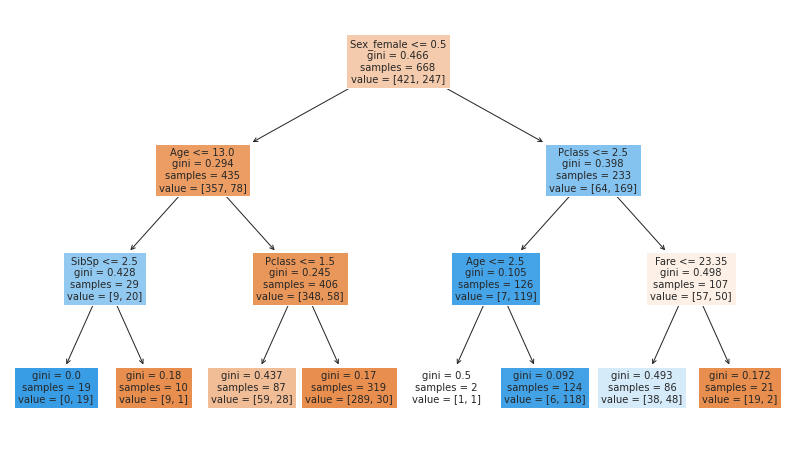

In [29]:
from sklearn.tree import plot_tree

plt.figure(figsize=(14, 8))
plot_tree(decision_tree = tree_one, feature_names = dummies.columns, filled = True, fontsize=10);

La visualización del árbol se lee así:

Para empezar, ‘samples’ se refiere a cuántos pasajeros caen dentro de esa condición (cada cuadro). Y ‘value’ se refiere a cuántas personas no sobrevivieron y cuántas sobrevivieron. Si por ejemplo: sample = 29 y value = [9, 20] tenemos que 29 pasajeros caen en esa condición, de los cuales sobrevivieron 20.

Luego, las condiciones se leen como: ¿El pasajero es hombre (Sex_female=0)? Si se cumple toma el camino de la izquierda. En caso de que se haya cumplido lo anterior, ahora pregunta: ¿La edad del pasajero es menor de 13 años? Nuevamente, si se cumple toma el camino de la izquierda, y así sucesivamente.



## Resultados del modelo

Ahora, podemos calcular la probabilidad individual de que cada pasajero sobreviva o no. Elegimos un pasajero aleatorio

In [44]:
pasajero_aleatorio = dummies.sample()
pasajero_aleatorio

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
382,3,32.0,0,0,7.925,0,1,0,0,1


In [46]:
tree_one.predict_proba(pasajero_aleatorio)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


array([[0.90595611, 0.09404389]])

En este caso obtuvimos que el pasajero tiene probabilidad del 90% de no sobrevivir y del 0.9% de sobrevivir. Veamos si es cierto, revisando la tabla original

In [51]:
df_train.iloc[[382]]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
382,383,0,3,"Tikkanen, Mr. Juho",male,32.0,0,0,STON/O 2. 3101293,7.925,NaN,S


Si hubiera sobrevivido 'Survived' tendría valor de 1, pero como tiene valor de 0, entonces se cumplió la predicción: no sobrevivió

## Entendiendo el árbol

Notamos que el modelo ha decidido que el género de la persona es el factor más importante a la hora de decidir si sobrevivió o no. Para entender por qué, veamos el histograma de los sobrevivientes por género

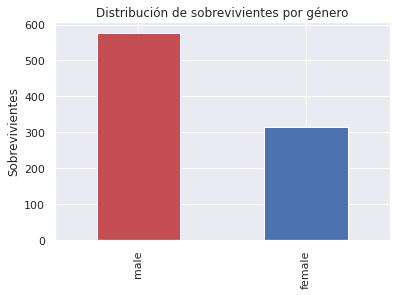

In [66]:
df_train.Sex.value_counts().plot(kind='bar', color=['r','b'])
plt.title('Distribución de sobrevivientes por género')
plt.ylabel('Sobrevivientes')
plt.show()

Hay más sobrevivientes hombres que mujeres